# ***Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

import math
import re

# Scikit-Learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier

SEED = 42

# ***Feature Importance***

In [19]:
data = pd.read_csv('MMSA_2021.csv')

In [3]:
columns = [
    # === List with all meaningful columns ===
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis
        '_DRDXAR3',
        '_LMTACT3',
        '_LMTWRK3',

        # Sec 11 Tobacco Use
        '_SMOKER3',
        '_RFSMOK3',
        '_CURECI1',

        # Sec 12 Alcohol Consumption
        'DRNKANY5',
        'ALCDAY5',
        '_RFBING5',
        '_DRNKWK1',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        'FTJUDA2_',
        'FRUTDA2_',
        'GRENDA1_',
        'FRNCHDA_',
        'POTADA1_',
        'VEGEDA2_',
        '_FRUTSU1',
        '_VEGESU1',
        '_FRTLT1A',
        '_VEGLT1A',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        'CHILDREN',
        '_RFBMI5',
        '_BMI5CAT',
        '_BMI5',
        'WTKG3',
        'HEIGHT3',
        '_AGE_G',
        '_AGE80',
        '_AGE65YR',
        '_AGEG5YR',
        '_SEX',
        '_RACEPRV',
        '_RACEGR3',
        '_RACEG21',
        '_RACE',
        '_HISPANC',
        '_MRACE1',
        '_PRACE1'
    ],

    # === 1st subset of all the meaningful columns === 
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis

        # Sec 11 Tobacco Use
        '_SMOKER3',

        # Sec 12 Alcohol Consumption
        '_RFBING5',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        '_FRUTSU1',
        '_VEGESU1',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        '_RFBMI5',
        '_BMI5CAT',
        '_AGE_G',
        '_SEX',
        '_RACE'
    ],


    # === 2nd subset of all the meaningul columns ===
    [
        # Sec 1 Health Status
        '_RFHLTH',

        # Sec 2 Healthy Days
        '_PHYS14D',
        '_MENT14D',

        # Sec 3 Health Care Access
        '_HLTHPLN',
        '_HCVU652',

        # Sec 4 Exercise
        '_TOTINDA',

        # Sec 5 Hypertension Awareness
        '_RFHYPE6',

        # Sec 6 Cholesterol Awareness
        '_CHOLCH3',
        '_RFCHOL3',

        # Sec 7 Chronic Health Conditions
        '_MICHD',

        # Sec 8 Arthritis
        

        # Sec 11 Tobacco Use
        '_SMOKER3',

        # Sec 12 Alcohol Consumption
        '_RFBING5',
        '_RFDRHV7',

        # Sec 14 HIV/AIDS
        '_AIDTST4',

        # Sec 15 Fruits & Vegetables
        '_FRTLT1A',
        '_VEGLT1A',
        
        # Sec 9 Demographics
        '_INCOMG1',
        '_EDUCAG',
        '_RFBMI5',
        '_BMI5CAT',
        '_AGE_G',
        '_SEX',
        '_RACE'
    ]
]

In [4]:
"""

1: For categorical
2: For continuous

"""

cat_con_variables = {
    # Sec 1 Health Status
    '_RFHLTH': 1,

    # Sec 2 Healthy Days
    '_PHYS14D': 1,
    '_MENT14D': 1,

    # Sec 3 Health Care Access
    '_HLTHPLN': 1,
    '_HCVU652': 1,

    # Sec 4 Exercise
    '_TOTINDA': 1,

    # Sec 5 Hypertension Awareness
    '_RFHYPE6': 1,

    # Sec 6 Cholesterol Awareness
    '_CHOLCH3': 1,
    '_RFCHOL3': 1,

    # Sec 7 Chronic Health Conditions
    '_MICHD': 1,

    # Sec 8 Arthritis
    '_DRDXAR3': 1,
    '_LMTACT3': 1,
    '_LMTWRK3': 1,

    # Sec 11 Tobacco Use
    '_SMOKER3': 1,
    '_RFSMOK3': 1,
    '_CURECI1': 1,

    # Sec 12 Alcohol Consumption
    'DRNKANY5': 1,
    'ALCDAY5': 2,
    '_RFBING5': 1,
    '_DRNKWK1': 2,
    '_RFDRHV7': 1,

    # Sec 14 HIV/AIDS
    '_AIDTST4': 1,

    # Sec 15 Fruits & Vegetables
    'FTJUDA2_': 2,
    'FRUTDA2_': 2,
    'GRENDA1_': 2,
    'FRNCHDA_': 2,
    'POTADA1_': 2,
    'VEGEDA2_': 2,
    '_FRUTSU1': 2,
    '_VEGESU1': 2,
    '_FRTLT1A': 1,
    '_VEGLT1A': 1,
    
    # Sec 9 Demographics
    '_INCOMG1': 1,
    '_EDUCAG': 1,
    'CHILDREN': 1,
    '_RFBMI5': 1,
    '_BMI5CAT': 1,
    '_BMI5': 2,
    'WTKG3': 2,
    'HEIGHT3': 2,
    
    # === The age variables can remain the same because their values represent a natural ordering ===
    '_AGE_G': 1,
    '_AGE80': 1,
    '_AGE65YR': 1,
    '_AGEG5YR': 1,
    
    '_SEX': 1,
    '_RACEPRV': 1,
    '_RACEGR3': 1,
    '_RACEG21': 1,
    '_RACE': 1,
    '_HISPANC': 1,
    '_MRACE1': 1,
    '_PRACE1': 1
}

In [5]:
# Check if the columns selected earlier exist in the dataset
for col in columns[0]:
    if col in data.columns:
        print(col)
    else:
        print(f'{col} does not exist')

_RFHLTH
_PHYS14D
_MENT14D
_HLTHPLN
_HCVU652
_TOTINDA
_RFHYPE6
_CHOLCH3
_RFCHOL3
_MICHD
_DRDXAR3
_LMTACT3
_LMTWRK3
_SMOKER3
_RFSMOK3
_CURECI1
DRNKANY5
ALCDAY5
_RFBING5
_DRNKWK1
_RFDRHV7
_AIDTST4
FTJUDA2_
FRUTDA2_
GRENDA1_
FRNCHDA_
POTADA1_
VEGEDA2_
_FRUTSU1
_VEGESU1
_FRTLT1A
_VEGLT1A
_INCOMG1
_EDUCAG
CHILDREN
_RFBMI5
_BMI5CAT
_BMI5
WTKG3
HEIGHT3
_AGE_G
_AGE80
_AGE65YR
_AGEG5YR
_SEX
_RACEPRV
_RACEGR3
_RACEG21
_RACE
_HISPANC
_MRACE1
_PRACE1


In [6]:
# How many null values each selected column has
isna_data = data[columns[0]].isna().sum()
for column, count in isna_data.items():
    print(f"{column}: {count}")

_RFHLTH: 0
_PHYS14D: 0
_MENT14D: 0
_HLTHPLN: 0
_HCVU652: 0
_TOTINDA: 0
_RFHYPE6: 0
_CHOLCH3: 0
_RFCHOL3: 29981
_MICHD: 2308
_DRDXAR3: 1480
_LMTACT3: 1480
_LMTWRK3: 1480
_SMOKER3: 0
_RFSMOK3: 0
_CURECI1: 0
DRNKANY5: 0
ALCDAY5: 13868
_RFBING5: 0
_DRNKWK1: 0
_RFDRHV7: 0
_AIDTST4: 17092
FTJUDA2_: 24654
FRUTDA2_: 24097
GRENDA1_: 24449
FRNCHDA_: 24886
POTADA1_: 26756
VEGEDA2_: 26817
_FRUTSU1: 27859
_VEGESU1: 32613
_FRTLT1A: 0
_VEGLT1A: 0
_INCOMG1: 0
_EDUCAG: 0
CHILDREN: 3540
_RFBMI5: 0
_BMI5CAT: 26341
_BMI5: 26341
WTKG3: 22711
HEIGHT3: 7408
_AGE_G: 0
_AGE80: 0
_AGE65YR: 0
_AGEG5YR: 0
_SEX: 0
_RACEPRV: 0
_RACEGR3: 0
_RACEG21: 0
_RACE: 0
_HISPANC: 0
_MRACE1: 0
_PRACE1: 0


In [20]:
data = data[columns[2]].dropna().copy()

In [21]:
# Store all categorical only columns in a list
object_cols = []
for col, cat_con_var in cat_con_variables.items():
    if cat_con_var == 1:
        object_cols.append(col)

print(f'Categorical Columns: \n{object_cols}')

Categorical Columns: 
['_RFHLTH', '_PHYS14D', '_MENT14D', '_HLTHPLN', '_HCVU652', '_TOTINDA', '_RFHYPE6', '_CHOLCH3', '_RFCHOL3', '_MICHD', '_DRDXAR3', '_LMTACT3', '_LMTWRK3', '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_RFDRHV7', '_AIDTST4', '_FRTLT1A', '_VEGLT1A', '_INCOMG1', '_EDUCAG', 'CHILDREN', '_RFBMI5', '_BMI5CAT', '_AGE_G', '_AGE80', '_AGE65YR', '_AGEG5YR', '_SEX', '_RACEPRV', '_RACEGR3', '_RACEG21', '_RACE', '_HISPANC', '_MRACE1', '_PRACE1']


In [22]:
data['_MICHD'] = data['_MICHD'].replace({1.0: 0, 2.0: 1})
data['_MICHD'] = data['_MICHD'].astype('int64')

# Convert categorical columns to integers. Categorical columns have float numerical values representing their categories, e.g 1.0, 2.0, 3.0
for column, col_type in cat_con_variables.items():
    if col_type == 1 and (column in data.columns):  # Check if the column is categorical
        data[column] = data[column].astype('int64')

In [23]:
# Use this if you want to utilize the one hot encoder
# The one hot encoder will create sub-variables for each distinct value of a variable
selected_cols = [col for col in set(object_cols) & set(data.columns) if col != '_MICHD']

data = pd.get_dummies(data, columns=selected_cols)

In [24]:
# Take all minority samples. Including duplicates
minority_samples = data[data['_MICHD'] == 0] 
num_minority_samples = len(minority_samples)

"""
Lets say that we want to take p% of the original dataframe as a sample. The first step we have to take is subtract the number of minority samples assuming we have already included them in our sample.
The second step is to add the necessary number of majority samples in our sample until we reach the upper limit which is p% of samples. We can add some of the unique samples from the majority class 
to the sample or we can randomly pick some of them. Below, we add unique samples to the sample.
"""
num_majority_samples =  math.floor(data.shape[0] * 0.25) - num_minority_samples
majority_unique_samples = data[data['_MICHD'] == 1].drop_duplicates()
num_unique_majority_samples = len(majority_unique_samples) # Not needed

majority_samples = majority_unique_samples.sample(n=num_majority_samples)

dataframe_sample = pd.concat([minority_samples, majority_samples])

In [25]:
target_column = "_MICHD"

#y = dataframes[2][target_column]
#x = dataframes[2].drop(columns=[target_column])

y = dataframe_sample[target_column]
x = dataframe_sample.drop(columns = [target_column])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED, stratify=y)

In [27]:
# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(10, 41)),
    'min_samples_split': randint(2, 21),
    'class_weight': [{0: 1, 1: 0.25}]
}

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=SEED)

# Initialize RandomizedSearchCV with custom scoring
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
                                   scoring=make_scorer(f1_score, average='weighted'), n_jobs=4, random_state=SEED)

In [28]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=4,
                   param_distributions={'class_weight': [{0: 1, 1: 0.25}],
                                        'max_depth': [None, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20,
                                                      21, 22, 23, 24, 25, 26,
                                                      27, 28, 29, 30, 31, 32,
                                                      33, 34, 35, 36, 37, 38, ...],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a0d1bc2ffa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a0d1b86c490>},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', average=weighted))

In [29]:
# Get the best parameters from the random search
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best estimator (Random Forest classifier with the best parameters)
best_rf_classifier = random_search.best_estimator_

# Train the best classifier on the entire dataset
best_rf_classifier.fit(x, y)

# Extract feature importance
feature_importances = best_rf_classifier.feature_importances_

Best Parameters: {'class_weight': {0: 1, 1: 0.25}, 'max_depth': 32, 'min_samples_split': 4, 'n_estimators': 199}


In [30]:
# Sort the features and their importance scores by importance in descending order
sorted_features = sorted(zip(x.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print all features and their importance scores in descending order
print("\nFeature Importance (Descending Order):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Feature Importance (Descending Order):
_AGE_G_6: 0.05710834295787528
_RFHYPE6_1: 0.04252576861366197
_RFHYPE6_2: 0.0356639826552656
_HCVU652_1: 0.03560484654268437
_HCVU652_9: 0.03381289634527617
_RFCHOL3_2: 0.03279201026164704
_RFHLTH_1: 0.028369830345600075
_RFHLTH_2: 0.022904451612052068
_AGE_G_5: 0.02241538182176361
_RFCHOL3_1: 0.01920811188211321
_SMOKER3_4: 0.017093090636993574
_PHYS14D_1: 0.016918397854180322
_EDUCAG_4: 0.016751064016231085
_INCOMG1_5: 0.01650396548181783
_EDUCAG_3: 0.015877926806102505
_FRTLT1A_1: 0.015550950219926822
_MENT14D_1: 0.015400538636024808
_AGE_G_2: 0.015297915982222085
_AIDTST4_2: 0.015242141024767878
_RACE_1: 0.015012595708636058
_EDUCAG_2: 0.014898437467843877
_BMI5CAT_4: 0.014734607223966873
_FRTLT1A_2: 0.014716764639672662
_BMI5CAT_3: 0.014493802252100781
_AGE_G_3: 0.014435663708145256
_INCOMG1_9: 0.014366468110789048
_AIDTST4_1: 0.01429539779754993
_PHYS14D_3: 0.014216713383882456
_SMOKER3_3: 0.014138869975191207
_VEGLT1A_1: 0.0140623648205724

In [31]:
feature_importance_sum = {}

for feature, importance in zip(x.columns, feature_importances):
    feature_name = re.sub(r'(.*?)_\d$', r'\1', feature)

    if feature_name in feature_importance_sum:
        feature_importance_sum[feature_name] += importance
    else:
        feature_importance_sum[feature_name] = importance

sorted_feature_importance_sum = sorted(feature_importance_sum.items(), key=lambda x: x[1], reverse=True)

for feature, importance_sum in sorted_feature_importance_sum:
    print(f"{feature}: {importance_sum}")

_AGE_G: 0.12515744036862422
_INCOMG1: 0.09732767274860532
_RFHYPE6: 0.07892733087752822
_HCVU652: 0.07225143639934248
_EDUCAG: 0.05612290683184599
_RFCHOL3: 0.053612387543567085
_RFHLTH: 0.051830539046195875
_RACE: 0.0492333699873761
_SMOKER3: 0.04894965167502864
_PHYS14D: 0.048444533765057224
_MENT14D: 0.04284853212825161
_BMI5CAT: 0.040715951364592246
_AIDTST4: 0.037264027071636806
_FRTLT1A: 0.03630949434358511
_VEGLT1A: 0.03432842300320449
_SEX: 0.02797159815561966
_TOTINDA: 0.026462315157822925
_RFBING5: 0.020872682089777134
_RFBMI5: 0.017221330688551518
_RFDRHV7: 0.013949728536717838
_HLTHPLN: 0.012297321493242879
_CHOLCH3: 0.007901326723826653


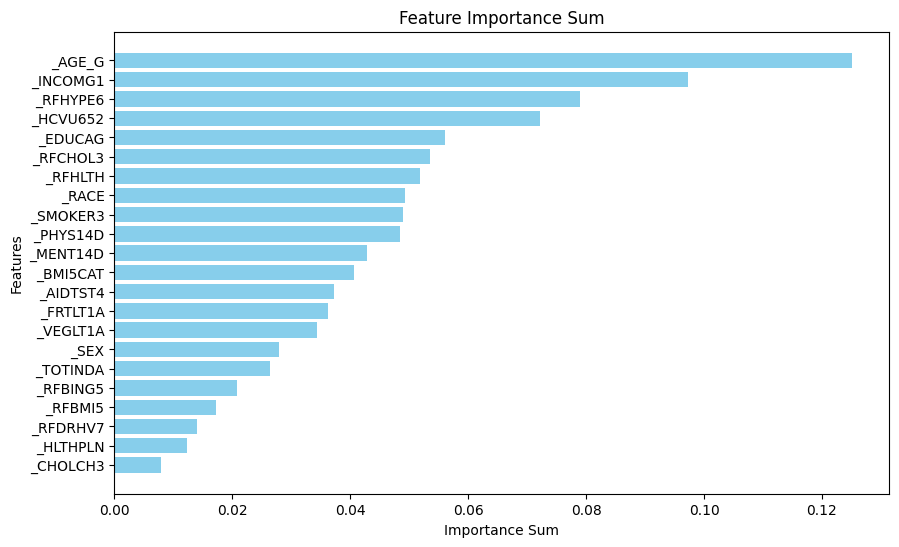

In [32]:
features = [feat for feat, _ in sorted_feature_importance_sum]
importance_sums = [imp_sum for _, imp_sum in sorted_feature_importance_sum]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance_sums, color='skyblue')
plt.xlabel('Importance Sum')
plt.ylabel('Features')
plt.title('Feature Importance Sum')
plt.gca().invert_yaxis()  # Invert y-axis to display features from top to bottom
plt.show()